In [1]:
import pandas as pd


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import statsmodels.api as sm

In [5]:
df_addMoney = pd.read_csv(r'C:\Users\Jash\Downloads\Outflows.csv')

In [6]:
df_addMoney

,investment_id,redeemed_principal,withdrawal_date
0,66774213,19604.209,01-06-2021
1,64936264,17651.360,01-06-2021
2,66774236,35000.000,01-06-2021
3,68162998,14731.246,01-06-2021
4,65378164,500000.000,01-06-2021
...,...,...,...
8672,84827195,36114.580,31-05-2022
8673,90656428,10000.000,31-05-2022
8674,90163144,16000.000,20-04-2022
8675,90295445,16000.000,20-05-2022


In [7]:
df_addMoney["withdrawal_date"] = pd.to_datetime(df_addMoney["withdrawal_date"],format='%d-%m-%Y')

In [8]:
df_addMoney["withdrawal_date"]

0      2021-06-01
1      2021-06-01
2      2021-06-01
3      2021-06-01
4      2021-06-01
          ...    
8672   2022-05-31
8673   2022-05-31
8674   2022-04-20
8675   2022-05-20
8676   2022-05-23
Name: withdrawal_date, Length: 8677, dtype: datetime64[ns]

In [9]:
df_addMoney.sort_values(by='withdrawal_date',ascending=True)

,investment_id,redeemed_principal,withdrawal_date
0,66774213,19604.2090,2021-06-01
1,64936264,17651.3600,2021-06-01
2,66774236,35000.0000,2021-06-01
3,68162998,14731.2460,2021-06-01
4,65378164,500000.0000,2021-06-01
...,...,...,...
8651,90274069,47969.4200,2022-05-31
8652,90141409,50000.0000,2022-05-31
8653,89900236,27000.1040,2022-05-31
8655,90154823,3892.2488,2022-05-31


In [10]:
df_addMoney_liquid = df_addMoney.groupby('withdrawal_date').sum()

In [11]:
df_addMoney_liquid

,investment_id,redeemed_principal
withdrawal_date,,
2021-06-01,665930855,9.665034e+05
2021-06-02,914698670,2.594379e+06
2021-06-03,598167326,1.096103e+06
2021-06-04,323816141,9.891774e+05
2021-06-05,559891145,1.272450e+06
...,...,...
2022-05-27,2102157839,2.564038e+06
2022-05-28,1158473556,3.435674e+05
2022-05-29,269957621,3.486391e+05


In [12]:
df_addMoney_lockin_month_0 = df_addMoney_liquid.drop(columns=['investment_id'])

In [13]:
df_addMoney_lockin_month_0

,redeemed_principal
withdrawal_date,
2021-06-01,9.665034e+05
2021-06-02,2.594379e+06
2021-06-03,1.096103e+06
2021-06-04,9.891774e+05
2021-06-05,1.272450e+06
...,...
2022-05-27,2.564038e+06
2022-05-28,3.435674e+05
2022-05-29,3.486391e+05


<AxesSubplot:xlabel='withdrawal_date'>

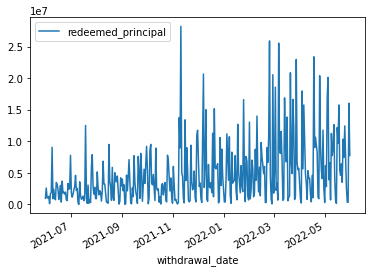

In [14]:
df_addMoney_lockin_month_0.plot()

<Figure size 432x288 with 0 Axes>

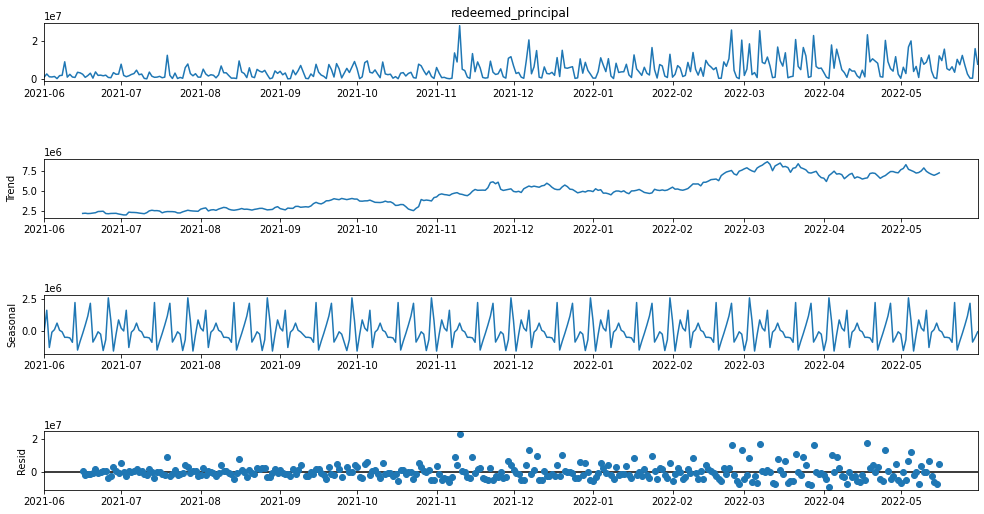

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_addMoney_lockin_month_0['redeemed_principal'], period=31)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)


In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

<AxesSubplot:xlabel='withdrawal_date'>

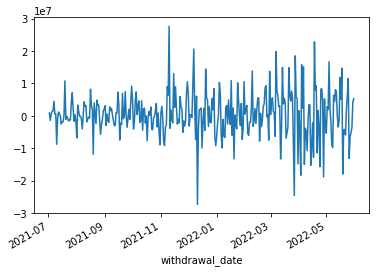

In [18]:
df_addMoney_lockin_month_0['Seasonal Difference'] = df_addMoney_lockin_month_0['redeemed_principal'] - df_addMoney_lockin_month_0['redeemed_principal'].shift(31)
df_addMoney_lockin_month_0['Seasonal Difference'].plot()

In [19]:
adf_check(df_addMoney_lockin_month_0['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.832632983978467
p-value : 0.002590538884411795
#Lags Used : 13
Number of Observations Used : 318
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [20]:
df_addMoney_lockin_month_0['Seasonal Difference'].min()

-27337320.2075

In [21]:
new_data2 = pd.DataFrame()

In [22]:
new_data2['final_difference'] = np.log(df_addMoney_lockin_month_0['Seasonal Difference']+27337420)

<AxesSubplot:xlabel='withdrawal_date'>

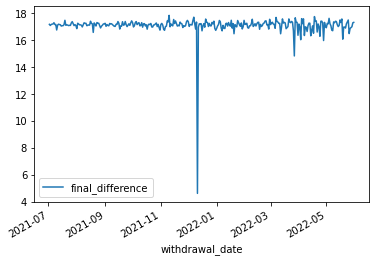

In [23]:
new_data2.plot()

In [24]:
new_data2

,final_difference
withdrawal_date,
2021-06-01,NaN
2021-06-02,NaN
2021-06-03,NaN
2021-06-04,NaN
2021-06-05,NaN
...,...
2022-05-27,16.849037
2022-05-28,16.918474
2022-05-29,16.977005


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

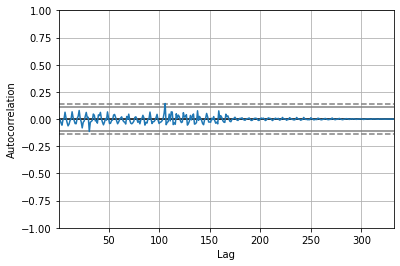

In [25]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(new_data2.dropna())

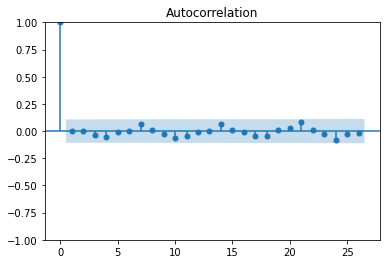

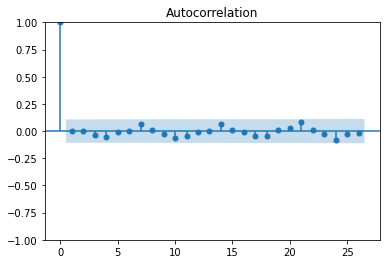

In [26]:
from statsmodels.graphics.tsaplots import  plot_acf

plot_acf(new_data2.dropna())

C:\Users\Jash\login\New folder\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


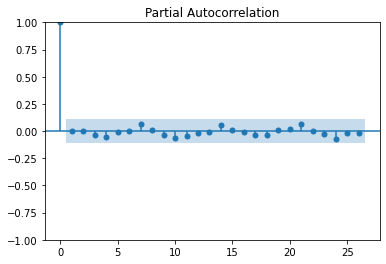

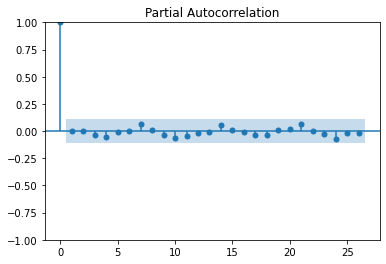

In [27]:
from statsmodels.graphics.tsaplots import  plot_pacf

plot_pacf(new_data2.dropna())

In [28]:
df_newadd = df_addMoney_lockin_month_0.reset_index()

In [29]:
df_newadd

,withdrawal_date,redeemed_principal,Seasonal Difference
0,2021-06-01,9.665034e+05,NaN
1,2021-06-02,2.594379e+06,NaN
2,2021-06-03,1.096103e+06,NaN
3,2021-06-04,9.891774e+05,NaN
4,2021-06-05,1.272450e+06,NaN
...,...,...,...
358,2022-05-27,2.564038e+06,-6.567069e+06
359,2022-05-28,3.435674e+05,-5.073594e+06
360,2022-05-29,3.486391e+05,-3.731572e+06
361,2022-05-30,1.602222e+07,4.264397e+06


In [31]:
model = sm.tsa.statespace.SARIMAX(df_newadd['redeemed_principal'],order=(1,1,1), seasonal_order=(0,1,0,31))
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                  redeemed_principal   No. Observations:                  363
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 31)   Log Likelihood               -5689.111
Date:                             Tue, 28 Jun 2022   AIC                          11384.223
Time:                                     12:57:08   BIC                          11395.629
Sample:                                          0   HQIC                         11388.772
                                             - 363                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0475      0.064      0.747      0.455      -0.077       0.172
ma.L1         -0.9969      

<AxesSubplot:>

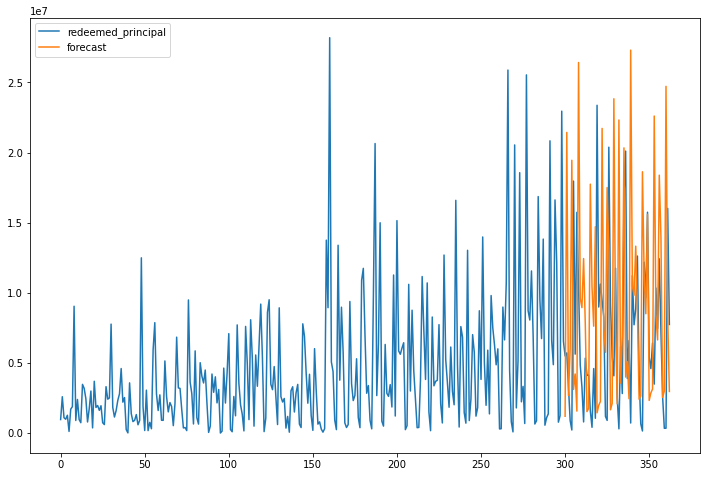

In [32]:
df_newadd['forecast'] = results.predict(start = 300, end= 362, dynamic= True)  
df_newadd[['redeemed_principal','forecast']].plot(figsize=(12,8))

In [33]:
df_newadd.tail()

,withdrawal_date,redeemed_principal,Seasonal Difference,forecast
358,2022-05-27,2.564038e+06,-6.567069e+06,2.546872e+06
359,2022-05-28,3.435674e+05,-5.073594e+06,3.004635e+06
360,2022-05-29,3.486391e+05,-3.731572e+06,2.471763e+07
361,2022-05-30,1.602222e+07,4.264397e+06,8.311260e+06
362,2022-05-31,7.743211e+06,5.236114e+06,2.968063e+06


In [34]:
from pandas.tseries.offsets import DateOffset

In [36]:
future_dates = [df_newadd['withdrawal_date'][362]+ DateOffset(days=x) for x in range(1,62) ]

In [37]:
future_dates

[Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-06-02 00:00:00'),
 Timestamp('2022-06-03 00:00:00'),
 Timestamp('2022-06-04 00:00:00'),
 Timestamp('2022-06-05 00:00:00'),
 Timestamp('2022-06-06 00:00:00'),
 Timestamp('2022-06-07 00:00:00'),
 Timestamp('2022-06-08 00:00:00'),
 Timestamp('2022-06-09 00:00:00'),
 Timestamp('2022-06-10 00:00:00'),
 Timestamp('2022-06-11 00:00:00'),
 Timestamp('2022-06-12 00:00:00'),
 Timestamp('2022-06-13 00:00:00'),
 Timestamp('2022-06-14 00:00:00'),
 Timestamp('2022-06-15 00:00:00'),
 Timestamp('2022-06-16 00:00:00'),
 Timestamp('2022-06-17 00:00:00'),
 Timestamp('2022-06-18 00:00:00'),
 Timestamp('2022-06-19 00:00:00'),
 Timestamp('2022-06-20 00:00:00'),
 Timestamp('2022-06-21 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-06-23 00:00:00'),
 Timestamp('2022-06-24 00:00:00'),
 Timestamp('2022-06-25 00:00:00'),
 Timestamp('2022-06-26 00:00:00'),
 Timestamp('2022-06-27 00:00:00'),
 Timestamp('2022-06-28 00:00:00'),
 Timestamp('2022-06-

In [38]:
future_df = pd.DataFrame()

In [39]:
future_df['withdrawal_date'] = future_dates

In [40]:
future_df = pd.concat([df_newadd,future_df])

In [41]:
future_df = future_df.reset_index()

In [42]:
future_df = future_df.drop(columns=['index'])

In [43]:
future_df

,withdrawal_date,redeemed_principal,Seasonal Difference,forecast
0,2021-06-01,9.665034e+05,NaN,NaN
1,2021-06-02,2.594379e+06,NaN,NaN
2,2021-06-03,1.096103e+06,NaN,NaN
3,2021-06-04,9.891774e+05,NaN,NaN
4,2021-06-05,1.272450e+06,NaN,NaN
...,...,...,...,...
419,2022-07-27,NaN,NaN,NaN
420,2022-07-28,NaN,NaN,NaN
421,2022-07-29,NaN,NaN,NaN
422,2022-07-30,NaN,NaN,NaN


<AxesSubplot:>

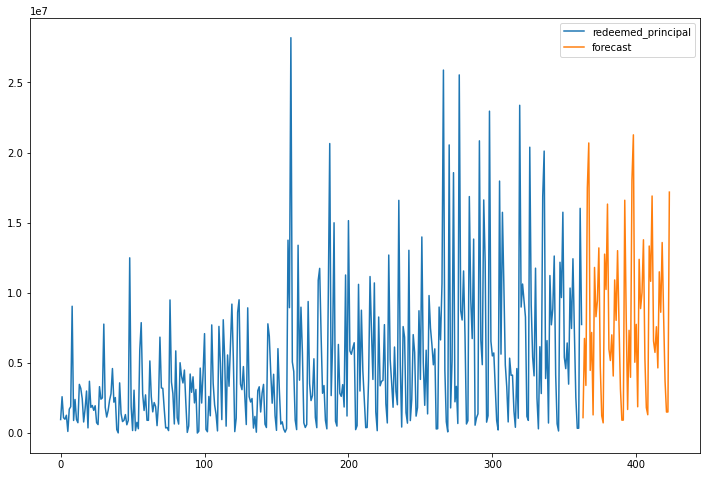

In [44]:
future_df['forecast'] = results.predict(start = 363, end = 423, dynamic= True)  
future_df[['redeemed_principal', 'forecast']].plot(figsize=(12, 8)) 

In [46]:
future_df.to_csv('future_df2.csv')